# **Bike Demand Prediction**
<font size="4px"><p>This project will predict the bike sharing demand with different parameters</p>
<dl>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
df = pd.read_csv('hour.csv')
df.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
bikes_prep = df.copy()
bikes_prep = bikes_prep.drop(['index', 'date', 'casual', 'registered'], axis=1)
bikes_prep.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [8]:
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

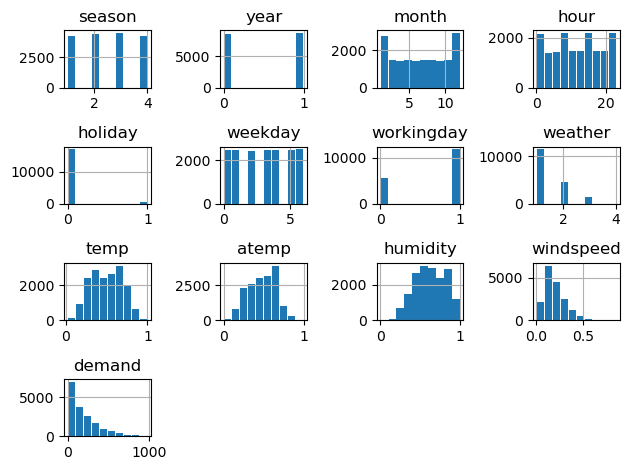

In [10]:
#Histogram
bikes_prep.hist(rwidth=0.9)
plt.tight_layout()

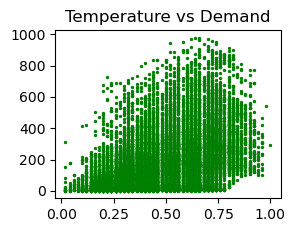

In [12]:
plt.subplot(2,2,1)
plt.title('Temperature vs Demand')
plt.scatter(bikes_prep['temp'], bikes_prep['demand'], s=2, c='g')

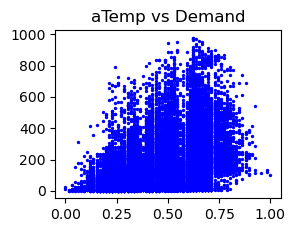

In [14]:
plt.subplot(2,2,2)
plt.title('aTemp vs Demand')
plt.scatter(bikes_prep['atemp'], bikes_prep['demand'], s=2, c='b')

<p> Since atemp (feels like temprature) is dependent to temp, the plots are similar</p>

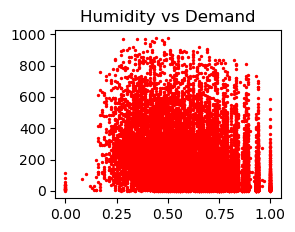

In [17]:
plt.subplot(2,2,3)
plt.title('Humidity vs Demand')
plt.scatter(bikes_prep['humidity'], bikes_prep['demand'], s=2, c='r')

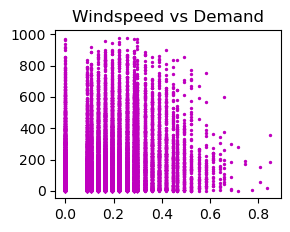

In [19]:
plt.subplot(2,2,4)
plt.title('Windspeed vs Demand')
plt.scatter(bikes_prep['windspeed'], bikes_prep['demand'], s=2, c='m')

<p> For humidity and windspeed, the scatterplots are not similar</p>

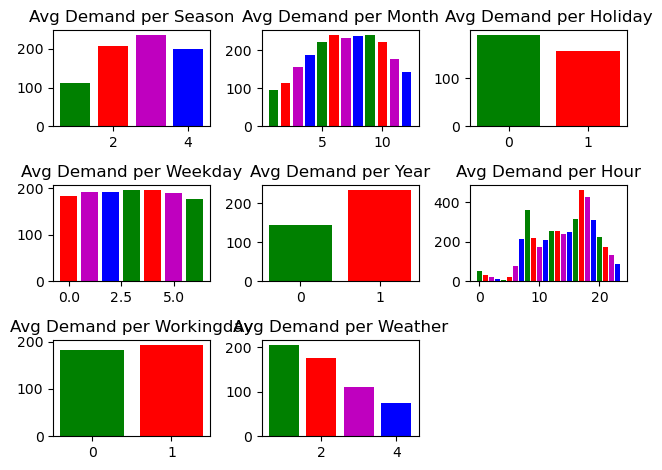

In [22]:
colours=['g','r','m','b']
plt.subplot(3,3,1)
cat_list = bikes_prep['season'].unique()
cat_average= bikes_prep.groupby('season').mean()['demand']
plt.title('Avg Demand per Season')
plt.bar(cat_list, cat_average, color=colours)

plt.subplot(3,3,2)
cat_list = bikes_prep['month'].unique()
cat_average= bikes_prep.groupby('month').mean()['demand']
plt.title('Avg Demand per Month')
plt.bar(cat_list, cat_average, color=colours)

plt.subplot(3,3,3)
cat_list = bikes_prep['holiday'].unique()
cat_average= bikes_prep.groupby('holiday').mean()['demand']
plt.title('Avg Demand per Holiday')
plt.bar(cat_list, cat_average, color=colours)
plt.subplot(3,3,4)
cat_list = bikes_prep['weekday'].unique()
cat_average= bikes_prep.groupby('weekday').mean()['demand']
plt.title('Avg Demand per Weekday')
plt.bar(cat_list, cat_average, color=colours)

plt.subplot(3,3,5)
cat_list = bikes_prep['year'].unique()
cat_average= bikes_prep.groupby('year').mean()['demand']
plt.title('Avg Demand per Year')
plt.bar(cat_list, cat_average, color=colours)

plt.subplot(3,3,6)
cat_list = bikes_prep['hour'].unique()
cat_average= bikes_prep.groupby('hour').mean()['demand']
plt.title('Avg Demand per Hour')
plt.bar(cat_list, cat_average, color=colours)

plt.subplot(3,3,7)
cat_list = bikes_prep['workingday'].unique()
cat_average= bikes_prep.groupby('workingday').mean()['demand']
plt.title('Avg Demand per Workingday')
plt.bar(cat_list, cat_average, color=colours)

plt.subplot(3,3,8)
cat_list = bikes_prep['weather'].unique()
cat_average= bikes_prep.groupby('weather').mean()['demand']
plt.title('Avg Demand per Weather')
plt.bar(cat_list, cat_average, color=colours)

plt.tight_layout()

<p> The plots of Weekday and Workingday show no significant change. And since there's only 2 different years it is insignificant <\p>

In [25]:
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

# Outliers

In [28]:
bikes_prep['demand'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

# Multicollinearity Assumption

In [31]:
correlation = bikes_prep[['temp', 'atemp', 'humidity','windspeed','demand']].corr()
print(correlation)

               temp     atemp  humidity  windspeed    demand
temp       1.000000  0.987672 -0.069881  -0.023125  0.404772
atemp      0.987672  1.000000 -0.051918  -0.062336  0.400929
humidity  -0.069881 -0.051918  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.062336 -0.290105   1.000000  0.093234
demand     0.404772  0.400929 -0.322911   0.093234  1.000000


<p>atemp is similar to temp in correlation with demand, therefore it could be dropped. On the other hand, windspeed does not have direct correlation with demand, it could be dropped too </p>

In [36]:
bikes_prep = bikes_prep.drop(['weekday','year','workingday','atemp','windspeed'],axis=1)

# Auto-correlation Test

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474693, 0.47049534, 0.4962279 , 0.49404034, 0.46795917,
        0.4773202 , 0.5267575 , 0.5914572 , 0.6520155 , 0.7151951 ,
        0.8059098 , 0.92530924, 1.        , 0.92530924, 0.8059098 ,
        0.7151951 , 0.6520155 , 0.5914572 , 0.5267575 , 0.4773202 ,
        0.46795917, 0.49404034, 0.4962279 , 0.47049534, 0.45474693],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x13b18da4f80>)

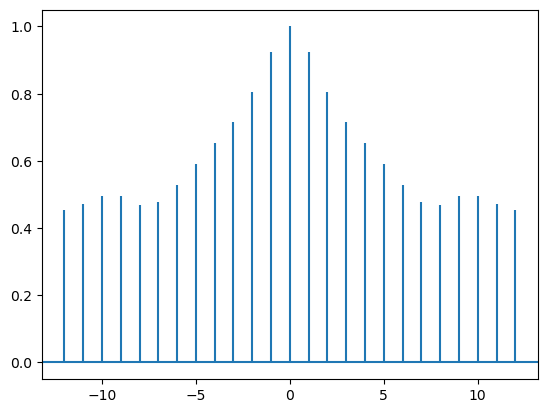

In [39]:
df1 = pd.to_numeric(bikes_prep['demand'], downcast = 'float')
plt.acorr(df1, maxlags=12)

<p>There is high auto-correlation in demand</p>

<Axes: >

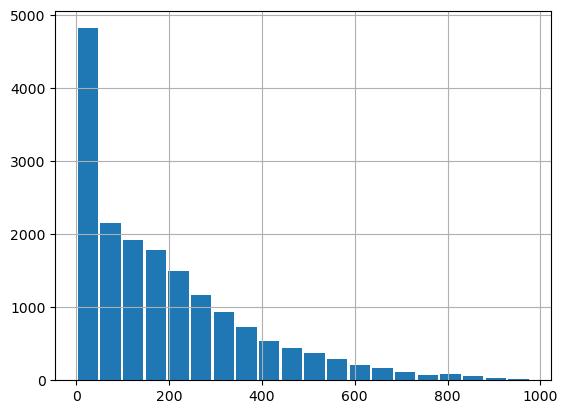

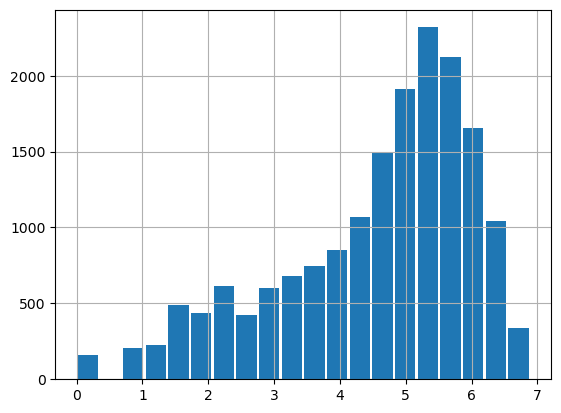

In [42]:
df1= bikes_prep['demand']
df2= np.log(df1)

plt.figure()
df1.hist(rwidth=0.9, bins=20)

plt.figure()
df2.hist(rwidth=0.9, bins=20)

<p> Since the demand is not normally distributed and it is a log-normal distribution. Converted values to log values, and the normal distribution is obtained</p>

In [46]:
bikes_prep['demand'] = np.log(bikes_prep['demand'])

# Correct the Auto-correlation

In [49]:
t_1= bikes_prep['demand'].shift(+1).to_frame()
t_1.columns=['t-1']

t_2= bikes_prep['demand'].shift(+2).to_frame()
t_2.columns=['t-2']

t_3= bikes_prep['demand'].shift(+3).to_frame()
t_3.columns=['t-3']

bikes_prep_lag = pd.concat([bikes_prep, t_1, t_2, t_3], axis=1)

In [51]:
bikes_prep_lag= bikes_prep_lag.dropna()

# Create Dummy Variables

In [54]:
bikes_prep_lag.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [56]:
bikes_prep_lag.dtypes
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')
bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first=True)

# Train and Test

In [59]:
Y= bikes_prep_lag[['demand']]
X= bikes_prep_lag.drop(['demand'], axis=1)

In [61]:
tr_size = 0.7*len(X)

In [63]:
tr_size= int(tr_size)

In [67]:
X_train= X.values[0:tr_size]
X_test= X.values[tr_size:len(X)]

Y_train= Y.values[0:tr_size]
Y_test= Y.values[tr_size:len(Y)]

In [71]:
from sklearn.linear_model import LinearRegression

std_reg= LinearRegression()
std_reg.fit(X_train, Y_train)


LinearRegression()

In [73]:
r2_train= std_reg.score(X_train, Y_train)
r2_test= std_reg.score(X_test, Y_test)

In [75]:
Y_predict= std_reg.predict(X_test)

In [79]:
from sklearn.metrics import mean_squared_error
rmse= math.sqrt(mean_squared_error(Y_test, Y_predict))

In [81]:
print(rmse)

0.3809880049817047


# Calculate RMSLE

In [84]:
Y_test_e=[]
Y_predict_e=[]

for i in range(0,len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))

C:\Users\Shyl\AppData\Local\Temp\ipykernel_18028\721639869.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_test_e.append(math.exp(Y_test[i]))
C:\Users\Shyl\AppData\Local\Temp\ipykernel_18028\721639869.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_predict_e.append(math.exp(Y_predict[i]))


In [86]:
log_sq_sum=0.0
for i in range(0,len(Y_test_e)):
    log_a=math.log(Y_test_e[i]+1)
    log_p=math.log(Y_predict_e[i]+1)
    log_diff= (log_p-log_a)**2
    log_sq_sum= log_sq_sum+log_diff
rmsle=math.sqrt(log_sq_sum/len(Y_test))

print("")
print(rmsle)


0.35609417069802124


# Conclusion
<p>From the calculation above, the value of RMSLE is obtained, this tells us the model's predictions is well-aligned with the actual values</p>